In [3]:
# Physics Problems 1
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.constants   as konst

Modified    By    Reason
--------    --    ------
04-July-23  CBL   Original, non-reltavistic scope deflection problem

Take this one step further, can we predict the deflection based on the potential? <br>
$ F = {q_{e}} V$ where V is the electric field in volts per meter. This gives the acceleration as: <br> 
$a = {{q_{e}}\over{m_{e}}} V$ <br> 
Good discussion of this here: <br> 
https://www.yorku.ca/marko/PHYS2211/Lab2 <br>
https://nvlpubs.nist.gov/nistpubs/jres/72C/jresv72Cn2p117_A1b.pdf <br>
https://mysite.du.edu/~etuttle/electron/elect29.htm <br>
<hr>

In [24]:
class Scope:
    def __init__(self, tube_length, Acc_Volt):
        """
        define a simple oscilliscope 
        @param tube_length - overall accelerating length of tube in meters. 
        @param Acc_Volt    - accelerating voltage
        """
        self.Volts       = Acc_Volt
        self.Length      = tube_length
        self.YAfter      = 0.5 * tube_length
        self.Speed       = self.Calc_Speed()
        self.def_length  = 0.02  # meters
        self.def_spacing = 0.002 # meters
        
    def Calc_Speed(self):
        """ 
        return the velocity of an electron given the accelerating voltage 
        """
        self.E = self.Volts/self.Length # applied electric field
        # Force is qE
        # divide by m to get acceleration
        self.acceleration = konst.e * self.E/konst.m_e

        # potential is mah = 1/2 mv^2
        speed = np.sqrt(2.0*self.acceleration/self.Length)
        return speed

    def Deflection(self,Volts_Y):
        """ 
        Calculate deflection in m based on deflection plate length and applied voltage.
        This is non-relatavistic calculation, the electron speeds really do make 
        this a relativistic problem. 
        """
        V0_Y          = 0.0                              # initial velocity, set to zero
        E_Deflection  = Volts_Y/self.def_spacing         # Volts/meter
        A_Y           = konst.e/konst.m_e * E_Deflection # meters/s^2
        dt            = self.def_length/self.Speed  # time between plates in seconds
        #print("dt: ", dt)
        VY = V0_Y + A_Y * dt     # meters per second
        Y  = 0.5 * A_Y * np.power(dt,2.0)  # meters
        #print("E_Y field: ", E_Deflection, " V/m, resulting acceleration: ",f"{A_Y:.3}", " m/s^2")
        #print("Y Velocity is: ", f"{VY:.3}  Displacement in Y is: ", Y)
        self.theta = np.arctan2(VY,self.Speed)   # radians 

        return Y
    
    def Project(self):
        Y_Screen =  self.YAfter * np.tan(self.theta) # meters
        return Y_Screen
    
    def Print(self):
        """ 
        print out resulting values
        """
        print("Electron speed m/s: ",f"{self.Speed:.3}")  # seems about right
        print("Deflection plate definition, length: ", self.def_length, " (m) spacing: ",
            self.def_spacing, "(m)" )


In [25]:
# define a scope 
scope = Scope(0.6, 1000)
scope.Print()
vy = 100.0 # volts
Y  = scope.Deflection(vy) 

Electron speed m/s:  3.13e+07
Deflection plate definition, length:  0.02  (m) spacing:  0.002 (m)


Text(0.5, 0, 'Applied voltage')

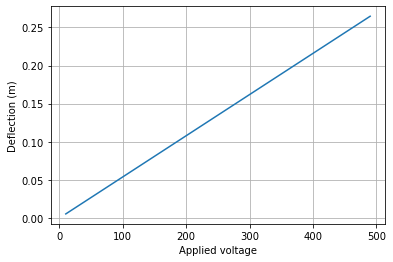

In [27]:
VY = np.arange(10.0, 500.0, 10.0)
Y  = scope.Deflection(VY)
YP = scope.Project() # project the full length of the scope tube.
plt.plot(VY,YP)
plt.grid()
plt.ylabel('Deflection (m)')
plt.xlabel('Applied voltage')

This all seems in the ballpark. Can use the scope to measure e/m ratio as a lab. 